# Text Analytics: 



In [ ]:
# imports 
import json
import gzip

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_gz_file(filename:str):
    l = []
    with gzip.open(filename, 'r') as f:
        for jsonObj in f:
            data = json.loads(jsonObj)
            l.append(data)


    return l
file_ = read_gz_file("/content/drive/MyDrive/Colab Notebooks/Assignment/Cell_Phones_and_Accessories_5.json.gz")

In [ ]:
type(file_)

list

In [ ]:
file_[1]

{'overall': 5.0,
 'verified': True,
 'reviewTime': '02 12, 2014',
 'reviewerID': 'A269FLZCB4GIPV',
 'asin': '7508492919',
 'reviewerName': 'sarah ponce',
 'reviewText': "When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!",
 'summary': '1',
 'unixReviewTime': 1392163200}

# Sentence segmentation. How many sentences are segmented by an exclamation mark, question mark, and period?


In [ ]:
corpus = []

for i in range(len(file_)):
    try:
        corpus.append(str(file_[i]['reviewText']))
    
    except KeyError:
        pass

In [ ]:
len(corpus)

1127672

In [ ]:
corpus[2]

"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far"

In [ ]:
sent = []
for s in corpus:
    sent.extend(sent_tokenize(s))

In [ ]:
def sentenceSegmentation(tokenized_corpus):

  exclamation = 0
  question = 0
  period = 0

  for i in range(len(tokenized_corpus)):
    for j in range(len(tokenized_corpus[i])):
      if tokenized_corpus[i][j][-1] == ".":
        period += 1
      elif tokenized_corpus[i][j][-1] == "?":
        question += 1
      elif tokenized_corpus[i][j][-1] == "!":
        exclamation += 1

  return(exclamation , question , period)

In [ ]:
exclamation, question, period = sentenceSegmentation(sent)

In [ ]:
print(f"Total number of sentences ending with ! is {exclamation} \n")
print(f"Total number of sentences ending with ? is {question} \n")
print(f"Total number of sentences ending with . is {period} \n")

Total number of sentences ending with ! is 437342 

Total number of sentences ending with ? is 42263 

Total number of sentences ending with . is 3991095 



> ### Data Preprocessing 


For data preprocessing of this corpus I'd would following preprocessing steps



1.   Removing punctuations like . , ! $( ) * % @
2.   Removing URLs
3.   Removing Stop words
4.   Lower casing
5.   Tokenization
6.   Contractions









In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.0 MB/s 
     |████████████████████████████████| 106 kB 42.2 MB/s 


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
import string 

string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessing(sentence):

  punct = r"[!\"#\$%&\'\(\)\*\+,-\./:;<=>\?@\[\\\]\^_`{\|}~]"
  tokenize = RegexpTokenizer(r'\w+')
  
  sentence = re.sub(punct, "", sentence)
  sentence = contractions.fix(sentence)
  sentence = re.sub(r'https?', "", sentence) 
  sentence = re.sub(r'[0-9]', '', sentence)
  sentence = sentence.lower()
  sentence = tokenize.tokenize(sentence)

  return(sentence)

In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Finding frequency and the rank of tokens

In [ ]:
import tqdm

from tqdm import tqdm

In [ ]:
vocab = {}


for i in tqdm(range(len(sent))):

  stop_words = set(stopwords.words("english"))
  sentence  = preprocessing(sent[i])

  for word in sentence:
    if word in stop_words:
      pass

    if word in vocab.keys():
      vocab[word] +=1
    else:
      vocab[word] = 1


100%|██████████| 4231672/4231672 [14:45<00:00, 4777.22it/s]


In [ ]:
len(vocab)

207461

In [ ]:
sorted_vocab = dict(sorted(vocab.items(), key=lambda x:x[1], reverse=True))

In [ ]:
total_num_words = sum(sorted_vocab.values())

In [ ]:
total_num_words

56826383

In [ ]:
freq = list(sorted_vocab.values())

In [ ]:
count_less = 0
word_less = 0

count_more = 0
word_more = 0
for i in range(len(freq)):
  if freq[i]<10:
    count_less += freq[i] 
    word_less += 1
  
  elif freq[i]>100000:
    count_more += freq[i]
    word_more += 1


In [ ]:
word_less/len(vocab)

0.8750319337128424

In [ ]:
word_less

181535

In [ ]:
word_more/len(vocab)

0.00040489537792645365

In [ ]:
word_more

84

A total of 87.5% words are useless for our analysis as we are rejecting words having frequency more than 100000 and less than 10. 

Hence, we can say that Pareto rule is applicable here. 

# Sentiment analysis using Stanza library and Naive Bayes

In [ ]:
pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 4.6 MB/s 
     |████████████████████████████████| 240 kB 54.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=13974d9529d8b08efa72b0d92219fdae45727db536ceda0dbe936a341389a319
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
import stanza
stanza.download('en')
stanza_pipeline = stanza.Pipeline(lang = 'en', processors='tokenize, sentiment', tokenize_no_ssplit=True)

INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: sentiment
INFO:stanza:Done loading processors!


In [ ]:
stanza_Value = stanza_pipeline(sent[1])

In [ ]:
def sentiment_val(sentence):
  stanza_Value = stanza_pipeline(sentence)
  sentiment = stanza_Value.sentences[0].sentiment

  if sentiment ==0 :
    return(True , 0)
  if sentiment == 2:
    return(True, 1)
  else:
    return(False, 0)

In [ ]:
import random

In [ ]:
def sampleGenerator(corpus , idx , num_samples):
  
  sample_X = []
  sample_Y = []
  total = 0

  while total < num_samples:
    # generate index
    index = int(random.random()*10000)

    if index not in idx:
      sample = corpus[index]
      idx.append(index)

    not_neutral, sentiment = sentiment_val(sample)

    if sentiment_val(sample)[0]:
      total += 1
      sample_X.append(sample)
      sample_Y.append(sentiment)

  return(idx , sample_X , sample_Y)





In [ ]:
a, sentiment = sentiment_val(sent[1])

In [ ]:
sentiment

0

In [ ]:
sampleGenerator(sent , [0] , 10)

([0,
  9984,
  2525,
  2142,
  7059,
  391,
  8248,
  6056,
  547,
  6338,
  8849,
  1538,
  4013,
  3118,
  6504,
  2364,
  2841,
  4896],
 ["This one I got from Plantronics is by far the best I have ever had and from what I've read the best on the market right now.",
  'What a bunch of fargin iceholes.',
  'Took me 2 minutes to replace the band and done.',
  'Not a happy camper on this purchase.',
  'I have bought other USB hubs in the past, and they all failed.',
  'DO NOT BUY THIS PRODUCT!!!',
  '), this fits wonderfully.',
  "It took a while to figure out how to install the headset to your ear, but I'm sure most, if not all, Bluetooth headsets share the same minor inconvenience.",
  'Great purchase.',
  "I actually haven't seen this as a real problem, although I would like to see if Motorola adds the feature to future versions of the Buds."],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
ind_train , train_X , train_Y =sampleGenerator(sent , [0] , 500)

In [ ]:
ind_test , test_X , test_Y =sampleGenerator(sent , ind_train , 250)

In [ ]:
len(train_X) , len(train_Y)

(500, 500)

In [ ]:
len(test_X) , len(test_Y)

(250, 250)

In [ ]:
from sklearn import feature_extraction
extractor = feature_extraction.text.CountVectorizer(stop_words='english')
X_train = extractor.fit_transform([x for x in train_X])
X_test = extractor.transform([x for x in test_X])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, train_Y)

MultinomialNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


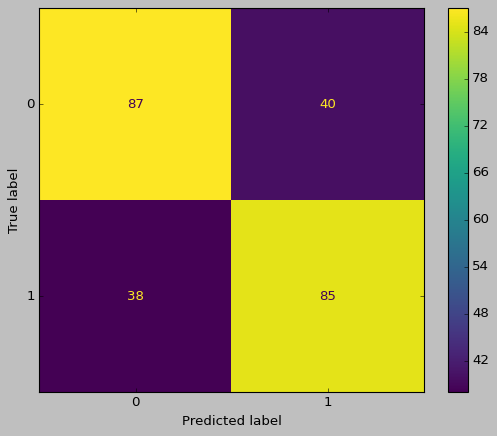

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('classic')
print(metrics.plot_confusion_matrix(model, X_test,test_Y,display_labels=['0','1']))

In [ ]:
y_predict = model.predict(X_test)
print(f"Accuracy = {metrics.accuracy_score(test_Y,y_predict)}")
print(f"Precision = {metrics.precision_score(test_Y,y_predict)}")
print(f"Recall =  {metrics.recall_score(test_Y,y_predict)}")
print(f"F1 Score = {metrics.f1_score(test_Y,y_predict)}")

Accuracy = 0.688
Precision = 0.68
Recall =  0.6910569105691057
F1 Score = 0.685483870967742


### End of Assignment 3

# Identifying aspects and sentiments using POS rules

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def Validate_chunking( corpus , aspect_rule):
	aspect_dict = Counter()
	opinion_dict = Counter()
	intensifier_dict = Counter()
	
	lemma = WordNetLemmatizer()

	i = 1

	for sentence in corpus:
		tokens = nltk.word_tokenize(sentence.lower())
		lemmatized_tokens = [lemma.lemmatize(token) for token in tokens]
		tags = nltk.pos_tag(lemmatized_tokens)
		
		aspect =  aspect_rule
		
		cp = nltk.RegexpParser(aspect)
		res = cp.parse(tags)
		for x in res:
			if type(x) == nltk.tree.Tree:
				for y in x.leaves():
					if 'NN' in y[1]: 
						aspect = [y[0]]
						aspect_dict.update(aspect)

					elif 'JJ' in y[1]:
						opinion = [y[0]]
						opinion_dict.update(opinion)
				
					elif 'RB' in y[1]: 
						intensifier = [y[0]]
						intensifier_dict.update(intensifier)
				
				
			print(i,end=' sentences processed \r')
			i += 1

	print("Aspects: ", aspect_dict.most_common(15))
	print("Opinions: ", opinion_dict.most_common(15))
	print("Intensifier: ", intensifier_dict.most_common(15))
	
	return (aspect_dict, opinion_dict, intensifier_dict)


In [ ]:
rule = ["{<JJ><NN.*>+}","{<NN.*>+}", "{<VB.*><NN.*>}", "{<NN.*><VB.*>}", "{<NN><NNS>}", "{<NNS> <JJ>}", "{<NNS><VB.*>}", "{<NN.*><JJ>}", "{<NN.*><VBZ>}", "{<RB.*><JJ>+}","{<RB><VBG>}"]

rule_new  = [ "r """ "ASPECT:" "" + rule  for rule in rule]



In [ ]:
rule_new

['r ASPECT:{<JJ><NN.*>+}',
 'r ASPECT:{<NN.*>+}',
 'r ASPECT:{<VB.*><NN.*>}',
 'r ASPECT:{<NN.*><VB.*>}',
 'r ASPECT:{<NN><NNS>}',
 'r ASPECT:{<NNS> <JJ>}',
 'r ASPECT:{<NNS><VB.*>}',
 'r ASPECT:{<NN.*><JJ>}',
 'r ASPECT:{<NN.*><VBZ>}',
 'r ASPECT:{<RB.*><JJ>+}',
 'r ASPECT:{<RB><VBG>}']

In [ ]:
sample_data = random.sample(sent , 1000)

### Validating rule 1 
$ \{<JJ> <NN.*>+\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[0]))

Aspects:  [('case', 50), ('i', 24), ('phone', 24), ('time', 20), ('product', 19), ('protector', 16), ('quality', 15), ('screen', 11), ('review', 11), ('protection', 10), ('charger', 10), ('glass', 10), ('price', 9), ('cable', 9), ('battery', 8)]
Opinions:  [('great', 38), ('good', 33), ('nice', 15), ('little', 14), ('new', 12), ('few', 11), ('other', 10), ('first', 9), ('same', 9), ('perfect', 9), ('long', 8), ('screen', 8), ('i', 8), ('much', 7), ('usb', 7)]
Intensifier:  []


### Validating rule 2
$ \{<NN.*>+\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[1]))

Aspects:  [('i', 305), ('phone', 185), ('case', 176), ('screen', 62), ('product', 47), ('time', 44), ('protector', 42), ('battery', 30), ('quality', 30), ('button', 29), ('work', 29), ('wa', 29), ('charger', 26), ('iphone', 26), ('review', 24)]
Opinions:  []
Intensifier:  []


### Validating rule 3
$ \{<VB.*><NN.*>\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[2]))

Aspects:  [('case', 7), ('anything', 7), ('something', 7), ('phone', 6), ('i', 4), ('color', 3), ('nothing', 3), ('compliment', 2), ('charge', 2), ('light', 2), ('mine', 2), ('issue', 2), ('cover', 2), ('plenty', 2), ('lot', 2)]
Opinions:  []
Intensifier:  []


### Validating rule 4
$ \{<NN.*><VB.*>\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[3]))

Aspects:  [('i', 220), ('case', 42), ('phone', 19), ('wa', 13), ('button', 7), ('product', 6), ('screen', 6), ('ha', 6), ('review', 5), ('price', 5), ('battery', 5), ('wireless', 4), ('time', 4), ('protector', 4), ('glass', 4)]
Opinions:  []
Intensifier:  []


### Validating rule 5
$ \{<NN><NNS>\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[4]))

Aspects:  [('i', 3), ('degree', 2), ('lens', 2), ('product', 1), ('thanks', 1), ('dock', 1), ('extenders', 1), ('auto', 1), ('reboots', 1), ('issue', 1), ('card', 1), ('whereas', 1), ('ali', 1), ('julia', 1), ('thing', 1)]
Opinions:  []
Intensifier:  []


### Validating rule 6
$ \{{NNS><JJ>}\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[5]))

Aspects:  [('micro', 1)]
Opinions:  [('usb', 1)]
Intensifier:  []


### Validating rule 7
$ \{ <NNS><VB.*>\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[6]))

Aspects:  [('i', 37), ('people', 2), ('lte', 1), ('keyes', 1), ('others', 1), ('julia', 1), ('smartphones', 1), ('data', 1), ('review', 1), ('thats', 1)]
Opinions:  []
Intensifier:  []


### Validating rule 8
$ \{\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[7]))

Aspects:  [('work', 8), ('case', 6), ('look', 4), ('product', 3), ('time', 3), ('wa', 3), ('feel', 3), ('ha', 3), ('brand', 3), ('anything', 3), ('bit', 2), ('micro', 2), ('offer', 2), ('screen', 2), ('[', 2)]
Opinions:  [('great', 10), ('i', 5), ('new', 5), ('free', 4), ('usb', 3), ('nice', 3), ('fit', 3), ('heavy', 2), ('due', 2), ('slim', 2), ('wa', 2), ('fine', 2), ('other', 2), ('high', 2), ('compatible', 1)]
Intensifier:  []


### Validating rule 9
$ \{\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[8]))

Aspects:  [('case', 24), ('phone', 7), ('price', 4), ('battery', 4), ('screen', 3), ('glass', 3), ('product', 3), ('grip', 3), ('device', 2), ('downside', 2), ('shell', 2), ('review', 2), ('moto', 2), ('thing', 2), ('fit', 2)]
Opinions:  []
Intensifier:  []


### Validating rule 10
$ \{\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[9]))

Aspects:  []
Opinions:  [('good', 19), ('i', 9), ('nice', 6), ('easy', 5), ('protective', 4), ('fine', 4), ('pleased', 4), ('sure', 4), ('great', 3), ('bulky', 3), ('much', 3), ('bad', 3), ('impressed', 3), ('happy', 3), ('difficult', 2)]
Intensifier:  [('very', 52), ('so', 17), ('not', 15), ('too', 14), ('really', 8), ('pretty', 6), ("n't", 6), ('just', 6), ('most', 4), ('more', 3), ('also', 3), ('extremely', 3), ('yr', 2), ('once', 2), ('still', 2)]


### Validating rule 11
$ \{\} $  

In [ ]:
aspect , opinion , intensifier = Validate_chunking( sample_data ,  str(rule_new[10]))

Aspects:  []
Opinions:  []
Intensifier:  [('not', 4), ('just', 4), ('still', 3), ('also', 1), ('visually', 1), ('even', 1), ('already', 1), ('potentially', 1), ('well', 1), ('therefore', 1), ('hard', 1), ('definitely', 1), ('wireless', 1), ('seriously', 1), ('always', 1)]


#### Now let's test the same on 1 percent of corpus 

In [ ]:
aspects = []
opinions = []
intensifiers = []

sample_data_new = random.sample(sent , int(len(sent)*0.01))

for i in range(11):
  aspect , opinion , intensifier = Validate_chunking( sample_data_new ,  str(rule_new[i]))
  if len(aspect) == 0:
    aspects.append(False)
  else:
    aspects.append(True)
  
  if len(opinion) == 0:
    opinions.append(False)
  else:
    opinions.append(True)

  if len(intensifier) == 0:
    intensifiers.append(False)
  else:
    intensifiers.append(True)

Aspects:  [('case', 2027), ('*', 984), ('phone', 915), ('product', 874), ('i', 849), ('protector', 604), ('time', 581), ('quality', 575), ('screen', 500), ('protection', 460), ('battery', 442), ('charger', 416), ('price', 381), ('fit', 312), ('thing', 309)]
Opinions:  [('great', 1584), ('good', 1351), ('other', 719), ('nice', 585), ('little', 465), ('few', 419), ('same', 386), ('new', 377), ('usb', 340), ('screen', 339), ('only', 338), ('i', 316), ('first', 304), ('excellent', 298), ('different', 284)]
Intensifier:  []
Aspects:  [('i', 13287), ('phone', 7470), ('case', 7131), ('screen', 2447), ('product', 2149), ('protector', 1648), ('time', 1535), ('work', 1474), ('battery', 1418), ('iphone', 1274), ('*', 1124), ('charger', 1094), ('wa', 1091), ('price', 1086), ('quality', 983)]
Opinions:  []
Intensifier:  []
Aspects:  [('i', 196), ('phone', 188), ('something', 171), ('case', 133), ('cable', 116), ('anything', 78), ('port', 77), ('everything', 73), ('nothing', 63), ('mine', 52), ('gla

In [ ]:
aspects, opinions, intensifiers

([True, True, True, True, True, True, True, True, True, False, False],
 [True, False, False, False, False, True, False, True, False, True, False],
 [False, False, False, False, False, False, False, False, False, True, True])

### Result

In [ ]:
import pandas as pd
d = {"Rule" : rule , "Aspect":aspects , "Opinion": opinions, "Intensifier": intensifiers }

pd.DataFrame(data=d)

,Rule,Aspect,Opinion,Intensifier
0,{<JJ><NN.*>+},True,True,False
1,{<NN.*>+},True,False,False
2,{<VB.*><NN.*>},True,False,False
3,{<NN.*><VB.*>},True,False,False
4,{<NN><NNS>},True,False,False
5,{<NNS> <JJ>},True,True,False
6,{<NNS><VB.*>},True,False,False
7,{<NN.*><JJ>},True,True,False
8,{<NN.*><VBZ>},True,False,False
9,{<RB.*><JJ>+},False,True,True


In [ ]:
  {<JJ.*><NN.*>}
        {<NN.*><JJ.*>}

        {<NN.*>+}

        {<RB.*><JJ.*>}
        {<RB.*><VB.*>}

['{<JJ><NN.*>+}',
 '{<NN.*>+}',
 '{<VB.*><NN.*>}',
 '{<NN.*><VB.*>}',
 '{<NN><NNS>}',
 '{<NNS> <JJ>}',
 '{<NNS><VB.*>}',
 '{<NN.*><JJ>}',
 '{<NN.*><VBZ>}',
 '{<RB.*><JJ>+}',
 '{<RB><VBG>}']

Apart form these rules few other rules can be:

Aspect
- $\{<RB.?>*<VB.?>*<NNP>+<NN>?\}$

Opinion
-  $\{<JJ. *><NN. *>\}$ 

Intensifier 
- $\{<RB. *><JJ. *>} {<RB. *><VB. *>\}

- \{<RBR. *><JJ. *>} {<RBR. *><VB. *>\}

- \{<RBS. *><JJ. *>} {<RBS. *><VB. *>\}$


In [ ]:
def chunkRule( corpus , rule):
	aspect_dict = Counter()
	opinion_dict = Counter()
	intensifier_dict = Counter()
	
	lemma = WordNetLemmatizer()

	i = 1

	for sentence in corpus:
		tokens = nltk.word_tokenize(sentence.lower())
		lemmatized_tokens = [lemma.lemmatize(token) for token in tokens]
		tags = nltk.pos_tag(lemmatized_tokens)
		
		
		cp = nltk.RegexpParser(rule)
		res = cp.parse(tags)
		for x in res:
			if type(x) == nltk.tree.Tree:
				for y in x.leaves():
					if 'NN' in y[1]: 
						aspect = [y[0]]
						aspect_dict.update(aspect)

					elif 'JJ' in y[1]:
						opinion = [y[0]]
						opinion_dict.update(opinion)
				
					elif 'RB' in y[1]: 
						intensifier = [y[0]]
						intensifier_dict.update(intensifier)
				
				
			print(i,end=' sentences processed \r')
			i += 1

	print("Top_15_Aspects: ", aspect_dict.most_common(15))
	print("Top_15_Opinions: ", opinion_dict.most_common(15))
	print("Top_15_Intensifier: ", intensifier_dict.most_common(15))
	
	return (aspect_dict, opinion_dict, intensifier_dict)


Let's run this on same 1 percent data

In [ ]:
rule  = r""" ASPECT: 
                  {<RB.?>*<VB.?>*<NNP>+<NN>?}
                  {<JJ.*><NN.*>} 
                  {<NN.*>+} 
                  {<RBS.*><JJ.*>} 
                  {<RBS.*><VB.*>} 
                  {<RBR.*><JJ.*>} 
                  {<RBR.*><VB.*>} 
                  {<RB.*><JJ.*>} 
                  {<RB.*><VB.*>}"""

In [ ]:
aspect, opinion, intensifier = chunkRule( sample_data_new , str(rule))

Top_15_Aspects:  [('i', 13287), ('phone', 7470), ('case', 7131), ('screen', 2447), ('product', 2149), ('protector', 1648), ('time', 1535), ('work', 1474), ('battery', 1418), ('iphone', 1274), ('*', 1124), ('charger', 1094), ('wa', 1091), ('price', 1086), ('quality', 983)]
Top_15_Opinions:  [('good', 1746), ('great', 1660), ('nice', 786), ('other', 720), ('i', 713), ('little', 480), ('much', 431), ('few', 421), ('new', 389), ('same', 387), ('best', 364), ('easy', 345), ('screen', 342), ('usb', 341), ('only', 338)]
Top_15_Intensifier:  [("n't", 3239), ('not', 2578), ('very', 1694), ('just', 978), ('so', 885), ('really', 809), ('i', 734), ('still', 605), ('also', 593), ('too', 514), ('only', 396), ('well', 347), ('even', 324), ('never', 315), ('always', 278)]
